In [21]:
import pandas as pd
import numpy as np
import matplotlib,plotly as plt
import plotly as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [22]:
test = pd.read_csv(r'C:\Users\drz\Downloads\Project\test.csv')
train = pd.read_csv(r'C:\Users\drz\Downloads\Project\train.csv')

In [23]:
test.head()

,ForecastId,Province/State,Country/Region,Lat,Long,Date
0,1,NaN,Afghanistan,33.0,65.0,2020-03-12
1,2,NaN,Afghanistan,33.0,65.0,2020-03-13
2,3,NaN,Afghanistan,33.0,65.0,2020-03-14
3,4,NaN,Afghanistan,33.0,65.0,2020-03-15
4,5,NaN,Afghanistan,33.0,65.0,2020-03-16


In [24]:
train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [25]:
train.describe()

,Id,Lat,Long,ConfirmedCases,Fatalities
count,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000
mean,13190.500000,26.287693,4.766191,293.191180,10.421208
std,7624.680783,22.935113,79.923334,3382.665468,155.612328
min,1.000000,-41.454500,-157.498300,0.000000,0.000000
25%,6595.750000,13.145425,-71.516375,0.000000,0.000000
50%,13190.500000,32.985550,9.775000,0.000000,0.000000
75%,19785.250000,42.501575,64.688975,8.000000,0.000000
max,26380.000000,71.706900,174.886000,67800.000000,5476.000000


In [26]:
train.iplot(kind = 'scatter', x = 'ConfirmedCases', y = 'Fatalities', title = 'Confirmed Cases vs Fatalities', xTitle = 'Confirmed', yTitle = 'Fatalities')

In [27]:
train[['ConfirmedCases', 'Fatalities']].iplot(kind = 'spread',xTitle = 'Confirmed', yTitle = 'Fatalities')

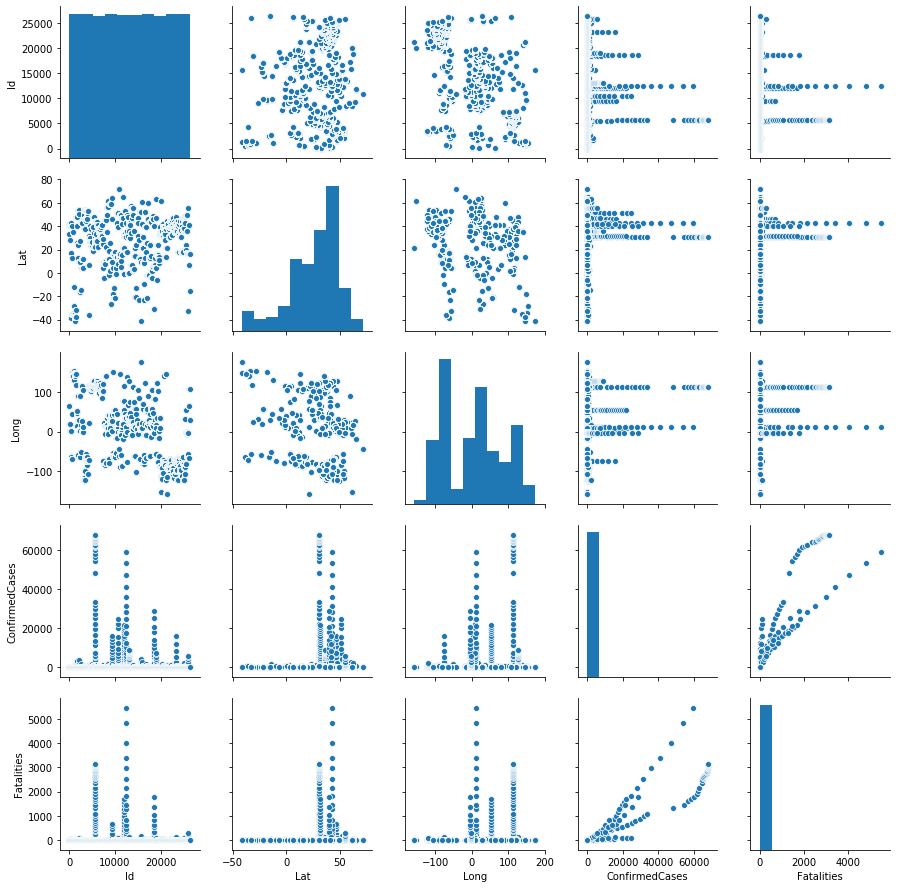

In [28]:
sns.pairplot(train)

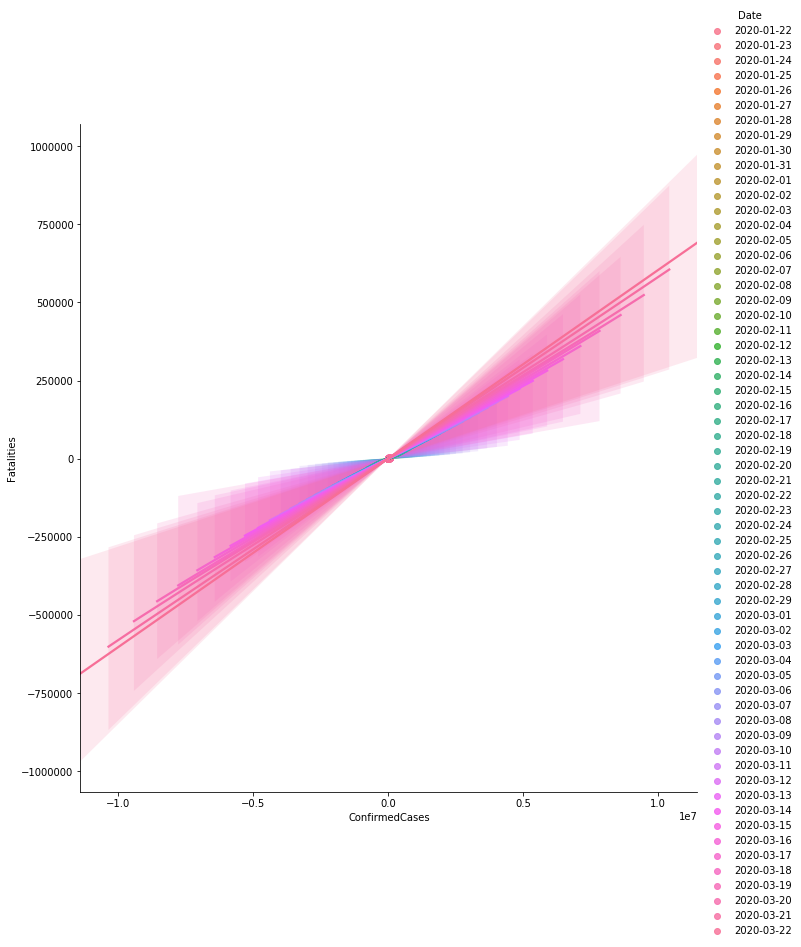

In [29]:
sns.lmplot(x = 'ConfirmedCases', y = 'Fatalities', data = train, hue = 'Date', height = 10)

In [30]:
train.drop(['Province/State', 'Country/Region'], axis = 1, inplace = True)

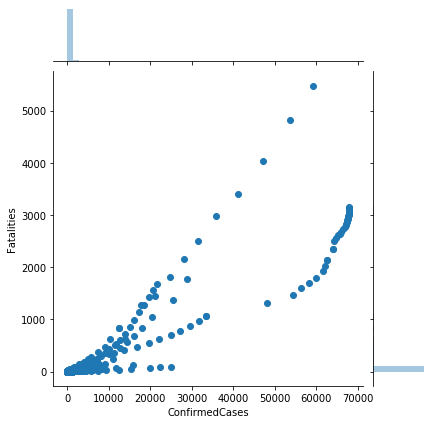

In [31]:
sns.jointplot(x = 'ConfirmedCases', y = 'Fatalities', data = train)

In [32]:
train.head()

,Id,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,33.0,65.0,2020-01-22,0.0,0.0
1,2,33.0,65.0,2020-01-23,0.0,0.0
2,3,33.0,65.0,2020-01-24,0.0,0.0
3,4,33.0,65.0,2020-01-25,0.0,0.0
4,5,33.0,65.0,2020-01-26,0.0,0.0


In [53]:
from sklearn.model_selection import train_test_split
X  = train[['Id']]
y = train[['ConfirmedCases', 'Fatalities' ]]

In [54]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 100)

In [55]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


In [56]:
lm.fit(X_train, y_train)
print(lm.intercept_)

[651.65229416  22.9834295 ]


In [57]:
lm.coef_

array([[-0.02640257],
       [-0.00094188]])

In [38]:
predictions = lm.predict(X_test)

In [59]:
predictions

array([[ 2.00000000e+00, -2.23477934e+00],
       [ 7.33280103e-12, -2.31967049e+00],
       [ 4.60000000e+01, -3.67173831e-01],
       ...,
       [ 7.33280103e-12, -2.31967049e+00],
       [ 1.19000000e+03,  4.81905693e+01],
       [ 7.33280103e-12, -2.31967049e+00]])

In [46]:
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test, predictions))
print('MSE', metrics.mean_squared_error(y_test, predictions))
print('RMS', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE 3.4541753233309933
MSE 1901.5785167192892
RMS 43.607092504766804
